# CIFAR-10 classification (задание 4)

## Задания 

Решить задачу классификации используя pytorch и нейронки. Попробовать получить бОльшую точность, например, можно поэкспериментировать следующими способами:

1. Поизменять архитектуру
2. Поиграться с аугментациями
3. optimizer (поизменять парамтеры, попробовать Adam)

## Ссылки

- [Код из видео](https://github.com/AlexanderLutsenko/Neural_nets_track/tree/master/classification
)
- [Датасеты](https://paperswithcode.com/task/image-classification)
- [Пример из pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [Про сверточные сети](https://neurohive.io/ru/tutorial/cnn-na-pytorch/)

In [ ]:
import matplotlib
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

Проверим, что есть GPU:

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
import matplotlib.pyplot as plt


def visualize_model(model, device, dataloader, class_names, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    plt.ion()
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//3, 3, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)
        plt.interactive(True)


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Модель (с изменениями)


## Параметры

In [ ]:
num_epochs = 100
num_classes = 10
batch_size = 200
learning_rate = 0.001
momentum = 0.8
linear_layer = 1000

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Трансормация и [аугментация](https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch) 

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Pad(4),
    transforms.RandomCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

## Датасет

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transform_test)

Extracting ../../data/cifar-10-python.tar.gz to ../../data/


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## Структура модели

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.reshape(input.size(0), -1)



model = nn.Sequential(
    # (b, c, h, w)
    
    # (b, 3, 32, 32)
    nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # (b, 64. 16, 16)
    nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # (b, 128, 8, 8)
    nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # (b, 256, 4, 4)
    nn.Conv2d(256, 512, kernel_size=5, stride=1, padding=2),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # (b, 512, 2, 2)
    Flatten(),
    
    # (b, 512*2*2)
    nn.Dropout(p=0.4),
    nn.Linear(2 * 2 * 512, linear_layer),
    nn.Linear(linear_layer, num_classes)
    
).to(device)

print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, s

## Оптимизатор и функция потерь

In [ ]:
loss_function = nn.CrossEntropyLoss()

## SGD optimizer

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

## Adam optimizer 

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Обучение модели

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      
        # Place training batch onto the appropriate device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass: compute predicted y by passing x to the model.
        outputs = model(images)

        # Compute loss.
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/100], Step [100/250], Loss: 1.9048
Epoch [1/100], Step [200/250], Loss: 1.4540
Epoch [2/100], Step [100/250], Loss: 1.2669
Epoch [2/100], Step [200/250], Loss: 1.2158
Epoch [3/100], Step [100/250], Loss: 1.1159
Epoch [3/100], Step [200/250], Loss: 1.0076
Epoch [4/100], Step [100/250], Loss: 0.8650
Epoch [4/100], Step [200/250], Loss: 0.8968
Epoch [5/100], Step [100/250], Loss: 0.8222
Epoch [5/100], Step [200/250], Loss: 0.7069
Epoch [6/100], Step [100/250], Loss: 0.6967
Epoch [6/100], Step [200/250], Loss: 0.7737
Epoch [7/100], Step [100/250], Loss: 0.6284
Epoch [7/100], Step [200/250], Loss: 0.4941
Epoch [8/100], Step [100/250], Loss: 0.6876
Epoch [8/100], Step [200/250], Loss: 0.6503
Epoch [9/100], Step [100/250], Loss: 0.6725
Epoch [9/100], Step [200/250], Loss: 0.7031
Epoch [10/100], Step [100/250], Loss: 0.6189
Epoch [10/100], Step [200/250], Loss: 0.7094
Epoch [11/100], Step [100/250], Loss: 0.6059
Epoch [11/100], Step [200/250], Loss: 0.6326
Epoch [12/100], Step [100/25

In [ ]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance; dropout disabled)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_loader), 100 * correct / total))

Test Accuracy of the model on the 50 test images: 87.03 %


## Результаты

- Базовая версия: `Test Accuracy of the model on the 40 test images: 77.28 %`
- Чуть-чуть изменить параметры (momentum=0.8, lr=0.002, epoch=60): `Test Accuracy of the model on the 40 test images: 78.73 %`
- Аугментации (заменил pad & crop на random resized crop): `Test Accuracy of the model on the 40 test images: 71.19 %` стало хуже
- Adam optimizer: `Test Accuracy of the model on the 40 test images: 85.12 %`
- Трансофрмация (добавил нормализацию к данным): `Test Accuracy of the model on the 40 test images: 85.91 %`
- Изменение структуры модели (увеличил кол-во каналов картинки в два раз: [64,128,256,512]): `Test Accuracy of the model on the 40 test images: 86.63 %`
- Добавил еще один полносвязный слой, увеличил размер ядер с 3х3 до 5х5: `Test Accuracy of the model on the 50 test images: 86.87 %`
- Увеличил кол-во эпох с 50 до 100: `Test Accuracy of the model on the 50 test images: 87.03 %`



## Предсказание

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


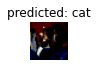

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


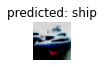

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


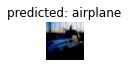

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


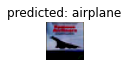

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


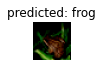

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


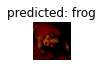

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


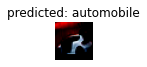

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


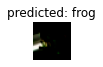

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


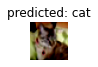

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


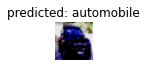

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


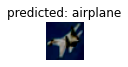

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


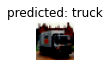

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


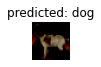

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


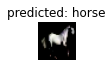

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


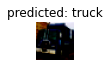

In [16]:
images_to_show = 20

visualize_model(model, device, test_loader, num_images=15, class_names=classes)